<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Naive Bayes classifier**

El clasificador que veremos a continuación se basa en un resultado estadístico muy simple pero poderoso: ¡el teorema de Bayes! Antes de profundizar en el clasificador, necesitaremos algunas nociones muy básicas de probabilidades condicionales. Sin embargo, la idea de cómo funciona el clasificador es muy simple:

> Dado un caso con determinadas características, utilizaremos el teorema de Bayes y los datos observados para estimar la probabilidad de que morosos y no morosos tengan las mismas características que el cliente. La mayor de estas dos probabilidades determinaría entonces cómo clasificamos el caso.

### Probabilidad condicional y teorema de Bayes

Sean $A$ y $B$ un par de eventos. Por ejemplo, piense en $A$ como el evento de que un cliente es moroso y en $B$ como el evento de que los ingresos del cliente han sido verificados. La **probabilidad condicional** del evento $A$ dado el evento $B$ se define como la probabilidad de observar el evento $A$ siempre que el evento $B$ ya haya ocurrido. Numéricamente, esto significa:

$$
\text{P($A$ dado $B$)} =P(A|B)= \frac{\text{P($A$ y $B$)}}{\text{P($B$) }}.
$$

Por supuesto, no hay nada especial en $A$ o $B$, por lo que podemos invertirlos en la identidad anterior para obtener:

$$
\text{P($B$ dado $A$)} = \frac{\text{P($B$ y $A$)}}{\text{P($A$)}}.
$$

Observe que los numeradores del lado derecho de ambas ecuaciones son idénticos. Por lo tanto, podemos igualarlos y sustituirlos en el resto de cada identidad para obtener:

$$
\begin{align}
    \text{P($A$ given $B$)}\text{P($B$)} &= \text{P($B$ given $A$)}\text{P($A$)} \\
    \\
    \Rightarrow\text{P($A$ given $B$)} &= \frac{\text{P($B$ given $A$)}\text{P($A$)}} {\text{P($B$)}}
\end{align}
$$

Este es el famoso **teorema de Bayes**, sobre el cual se construye el clasificador Naive Bayes.

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
dataset = datasets.load_breast_cancer()

In [ ]:
X = dataset.data[:,0:2]

In [ ]:
y = dataset.target

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo = GaussianNB()

In [ ]:
modelo.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print(matriz)

[[31  9]
 [ 5 69]]


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(precision)

0.8846153846153846


In [ ]:
%matplotlib inline
import pylab as pl
import pandas as pd
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn import datasets

def plot_data(X, y):   #Función para graficar datos (X,y)
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
def plot_decision_region(X, pred_fun):      #Función para visualizar la superficie de decisión de nuestro algoritmo.
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


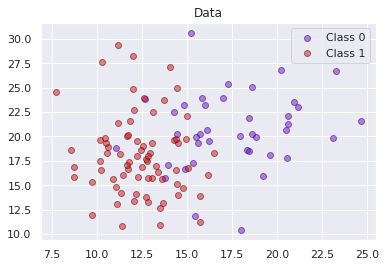

In [ ]:
plot_data(x_test, y_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


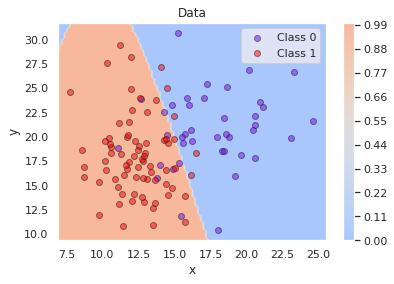

In [ ]:
plot_decision_region(x_test, gen_pred_fun(modelo))
plot_data(x_test, y_test)